In [15]:
# Step 1 — Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure plots folder exists
os.makedirs("data/plots", exist_ok=True)

# Path to rollups file
rollups_path = "/Users/jaidevreddy/Documents/Documents - Jaidev’s MacBook Pro/projects/blr-renewables/data/processed/phase4_city_rollups.parquet"


In [21]:
# Step 2 — Load the zone-level daily rollups
df = pd.read_parquet(rollups_path)

# Inspect structure
print(df.shape)
print(df.columns)
df.head()



(951, 8)
Index(['date', 'n_zones', 'mean_kwh', 'median_kwh', 'p05_kwh', 'p95_kwh',
       'min_kwh', 'max_kwh'],
      dtype='object')


,date,n_zones,mean_kwh,median_kwh,p05_kwh,p95_kwh,min_kwh,max_kwh
0,2023-01-02,223,56.847135,57.876854,54.941640,57.905887,54.932285,57.914460
1,2023-01-03,223,54.233779,53.858591,53.832746,54.943812,53.828533,54.947462
2,2023-01-04,223,55.082786,54.509611,54.484485,56.153216,54.480380,56.157057
3,2023-01-05,223,45.121729,42.923987,42.842427,49.216175,42.827577,49.245058
4,2023-01-06,223,48.862489,48.877734,48.810705,48.901674,48.802092,48.908754


In [25]:
# Cell 3 — Prepare data
df = df.sort_values("date")
# Ensure date is a datetime type
df['date'] = pd.to_datetime(df['date'])


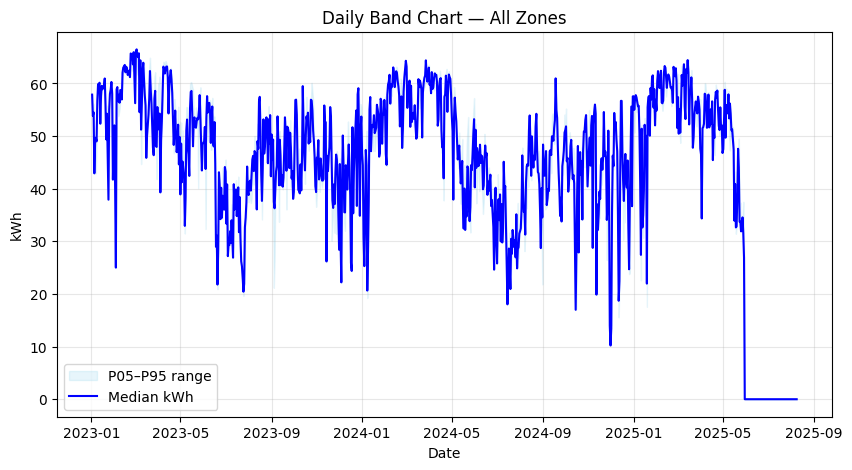

In [30]:
# Cell 4 — Daily Band Chart (all zones)
df['date'] = pd.to_datetime(df['date'])  # ✅ ensure proper datetime

plt.figure(figsize=(10, 5))
plt.fill_between(df['date'], df['p05_kwh'], df['p95_kwh'],
                 alpha=0.2, color="skyblue", label="P05–P95 range")
plt.plot(df['date'], df['median_kwh'], color="blue", label="Median kWh")
plt.title("Daily Band Chart — All Zones")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("data/plots/daily_band_all_zones.png", dpi=150)
plt.show()



In [ ]:
# Cell 5 — Monthly Profile Chart (all zones)
df['month'] = df['date'].dt.month
monthly = df.groupby('month').agg({
    'median_kwh': 'median',
    'p05_kwh': 'median',
    'p95_kwh': 'median'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.fill_between(monthly['month'], monthly['p05_kwh'], monthly['p95_kwh'],
                 alpha=0.2, color="orange", label="P05–P95 range")
plt.plot(monthly['month'], monthly['median_kwh'], color="red", marker="o", label="Median kWh")
plt.title("Monthly Profile — All Zones")
plt.xlabel("Month")
plt.ylabel("kWh")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("data/plots/monthly_profile_all_zones.png", dpi=150)
plt.close()



✅ Saved: monthly_profile_all_zones.png


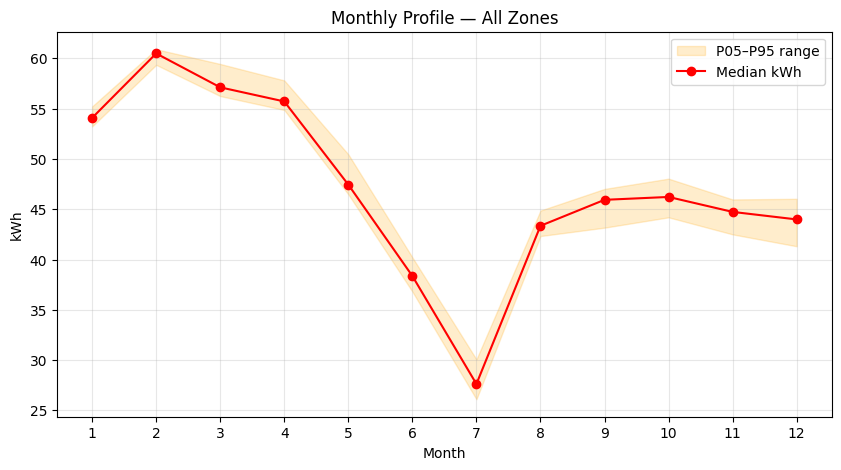

In [32]:
# Cell 5 — Monthly Profile Chart (all zones)
df['date'] = pd.to_datetime(df['date'])  # ensure datetime
df['month'] = df['date'].dt.month

monthly = df.groupby('month').agg({
    'median_kwh': 'median',
    'p05_kwh': 'median',
    'p95_kwh': 'median'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.fill_between(monthly['month'], monthly['p05_kwh'], monthly['p95_kwh'],
                 alpha=0.2, color="orange", label="P05–P95 range")
plt.plot(monthly['month'], monthly['median_kwh'], color="red", marker="o", label="Median kWh")
plt.title("Monthly Profile — All Zones")
plt.xlabel("Month")
plt.ylabel("kWh")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
